# IBM developer Skills network

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/sonpn82/Python-machine-learning-project/master/loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


## Convert date time object

In [3]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Data visualization and preprocessing

In [4]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

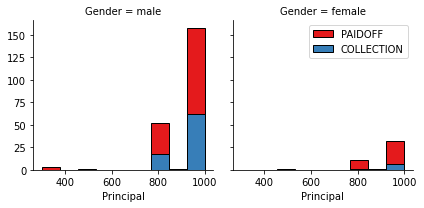

In [7]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")
g.axes[-1].legend()

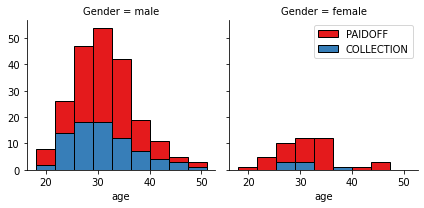

In [8]:
bins=np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status",palette="Set1",col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")
g.axes[-1].legend()

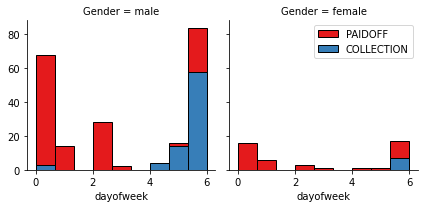

In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek  # convert date to day of week
bins=np.linspace(df.dayofweek.min(), df.dayofweek.max(),10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1",col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [11]:
# Change day of week to weekend - people tend to not pay the loan off at end of week
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert categorical feature to numerical value

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [13]:
df['Gender'].replace(to_replace=['male', 'female'], value=[0,1], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [15]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)  # convert categorical vals to dummy columns with 1, 0 val
Feature.drop(['Master or Above'], axis=1, inplace=True)  # drop this col ?
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


## Feature selection

In [16]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [17]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [19]:
df['loan_status'].replace(to_replace=['COLLECTION', 'PAIDOFF'], value=[0,1], inplace=True)

In [20]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Normalize data

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification

## K Nearest neighbor (KNN)

## Train test split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)

(276, 8)
(70, 8)


## Training

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [24]:
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

[0.65714286 0.68571429 0.7        0.71428571 0.7        0.67142857
 0.68571429 0.7        0.68571429]
The best accuracy was with 0.7142857142857143 with k= 4


In [25]:
k = 4  # Run again with the best K value
neigh = KNeighborsClassifier(n_neighbors= k).fit(X_train, y_train)

## Decision tree

## Train test split

In [26]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train2.shape)
print(X_test2.shape)

(276, 8)
(70, 8)


## Training

In [27]:
from sklearn.tree import DecisionTreeClassifier

loanTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
loanTree.fit(X_train2, y_train2)
predTree = loanTree.predict(X_test2)

In [28]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test2, predTree))

DecisionTrees's Accuracy:  0.6857142857142857


## Support vector machine SVC

## Train test split

In [29]:
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train3.shape)
print(X_test3.shape)

(276, 8)
(70, 8)


## Training 

In [30]:
from sklearn import svm
clf_r = svm.SVC(kernel='rbf')  # rbf kernel
clf_r.fit(X_train3, y_train3)
yhat_r = clf_r.predict(X_test3)

clf_l = svm.SVC(kernel='linear')  # linear kernel
clf_l.fit(X_train3, y_train3)
yhat_l = clf_l.predict(X_test3)

clf_p = svm.SVC(kernel='poly')  # polynorminal kernel
clf_p.fit(X_train3, y_train3)
yhat_p = clf_p.predict(X_test3)

clf_s = svm.SVC(kernel='sigmoid')  # linear kernel
clf_s.fit(X_train3, y_train3)
yhat_s = clf_s.predict(X_test3)

In [31]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

print('rbf f1:', f1_score(y_test3, yhat_r, average='weighted'))
print('rbf jaccard:', jaccard_score(y_test3, yhat_r))

print('linear f1:', f1_score(y_test3, yhat_l, average='weighted'))
print('linear jaccard:', jaccard_score(y_test3, yhat_l))

print('poly f1:', f1_score(y_test3, yhat_p, average='weighted'))
print('poly jaccard:', jaccard_score(y_test3, yhat_p))

print('sigmoid f1:', f1_score(y_test3, yhat_s, average='weighted'))
print('sigmoid jaccard:', jaccard_score(y_test3, yhat_s))

rbf f1: 0.5764705882352941
rbf jaccard: 0.7
linear f1: 0.5694915254237288
linear jaccard: 0.6857142857142857
poly f1: 0.6201739130434782
poly jaccard: 0.6911764705882353
sigmoid f1: 0.5403508771929825
sigmoid jaccard: 0.6285714285714286


### Poly gives best result

## Logistic regression

## Train test split

In [32]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train4.shape)
print(X_test4.shape)

(276, 8)
(70, 8)


## Training

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train4, y_train4)
yhat4 = LR.predict(X_test4)
yhat_prob4 = LR.predict_proba(X_test4)

In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

print('f1:', f1_score(y_test4, yhat4, average='weighted'))
print('jaccard:', jaccard_score(y_test4, yhat4))
print('log_loss:', log_loss(y_test4, yhat_prob4))

f1: 0.6004459308807136
jaccard: 0.6956521739130435
log_loss: 0.5858479985828119


# Model evaluation using test set

In [35]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [36]:
test_df = pd.read_csv('https://raw.githubusercontent.com/sonpn82/Python-machine-learning-project/master/loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


## Date time conversion

In [37]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


## Replace categorical value with integer

In [38]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0


## Change dayofweek to weekend type

In [39]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


## Get the features from dataframe

In [40]:
Feature2 = test_df[['Principal','terms','age','Gender','weekend']]
Feature2 = pd.concat([Feature2,pd.get_dummies(test_df['education'])], axis=1)
Feature2.drop(['Master or Above'], axis = 1,inplace=True)
Feature2.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [41]:
X2 = Feature2
X2[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [42]:
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,1,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,1,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,1,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [43]:
y2 = test_df['loan_status'].values
y2[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Normalizing the data

In [45]:
X2= preprocessing.StandardScaler().fit(X2).transform(X2)
X2[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

## Start evaluation

In [46]:
## Knearest neighbor
yhat_neigh = neigh.predict(X2)
yhat_neigh[0:5]

print('f1:', f1_score(y2, yhat_neigh, average='weighted'))
print('jaccard:', jaccard_score(y2, yhat_neigh))

f1: 0.6276094276094276
jaccard: 0.5625


In [47]:
## Decision tree
yhat_tree = loanTree.predict(X2)
yhat_tree[0:5]

print('f1:', f1_score(y2, yhat_tree, average='weighted'))
print('jaccard:', jaccard_score(y2, yhat_tree))

f1: 0.6119162640901772
jaccard: 0.7037037037037037


In [48]:
## SVM
yhat_poly = clf_p.predict(X2)
yhat_poly[0:5]

print('f1:', f1_score(y2, yhat_poly, average='weighted'))
print('jaccard:', jaccard_score(y2, yhat_poly))

f1: 0.6959228135698723
jaccard: 0.75


In [49]:
## Logistic regression
yhat_lr = LR.predict(X2)
yhat_prob_lr = LR.predict_proba(X2)

print('f1:', f1_score(y2, yhat_lr, average='weighted'))
print('jaccard:', jaccard_score(y2, yhat_lr))
print('log_loss:', log_loss(y2, yhat_prob_lr))

f1: 0.6717642373556352
jaccard: 0.7547169811320755
log_loss: 0.565017831496447


# Report

| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.56    | 0.62     | NA      |
| Decision Tree      | 0.70    | 0.61     | NA      |
| SVM                | 0.75    | 0.69     | NA      |
| LogisticRegression | 0.75    | 0.67     | 0.56    |